# A Graphical Analysis of Suicide Rate in the Past Three Decades

## Introduction
Suicide is dea caused by injuring oneself with the intent to take one's life. According to CDC, it is the 9th leading cause of death for the people of age 10-64 and the second leading cause of death for people of age 10-14 and 25-34. With nearly 1 death every 11 minutes, countless families have suffered immensely due to the suicide of their loved ones. Needless to say, understanding why people are taking their lives can go a long way in possibly preventing suicide and help those in need. 
In this paper, I will take a closer look at the suicide rate across different countries and attempt to understand what factors into one's death. Specifically, the date will focus on gender, age and a country's GDP from the year 1985 to 2016. This project aims to take the reading through the process of Data Science pipeline which consist of 
-  Data Collection
-  Data management/representation
-  Exploratory data analysis
-  Hypotehsis testing
-  Communication of insights attained

I will be using these 5 libraries
1. [Pandas](https://pandas.pydata.org/)
2. [Numpy](https://numpy.org/)
3. [Seaborn](https://seaborn.pydata.org/)
4. [Matplotlib](https://matplotlib.org/)
5. [Sciki-learn](https://scikit-learn.org/stable/)

## Data Collection
The dataset I'm using comes a collection of many sources. All of them is listed below. 
- [United Nations Development Program: Human Development Index](https://hdr.undp.org/en/indicators/137506)
- [World Bank, GDP(1985-2016)](https://databank.worldbank.org/source/world-development-indicators)
- [World Health Organization, Suicide Prevention](https://www.who.int/health-topics/suicide)
- [Suicide Rate Overview](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)
- [Suicide in the Twenty-First Century](https://www.kaggle.com/code/szamil/suicide-in-the-twenty-first-century/notebook)

I will first import all the library that will be used and load in the data. The data is contained in a csv file called "data.csv". I will also rename some of the column for convinence. 

In [4]:
!pip install pycountry
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pycountry
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("data.csv")
df.rename(columns = {"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Data Management/Representation
In this next section, I will represent the data through a variety of different methods in hope that they will produce fruitful insight. Specifically, I want to speculate on what factors into commiting suicide. There are several factors in questions, gender, age, generation and countries. I will use some of the data science techniques and draw some conclusion from each representation. Hopefully, by the end of this exercise, I would be able to notice a trend of what population is most susceptible to commiting suicide. 

### Gender
From the line plot below, we can see that the number of male committing suicide is consistently higher than female by a significant margin. The amount of male suicide is roughly triple the amount of female suicide. 

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


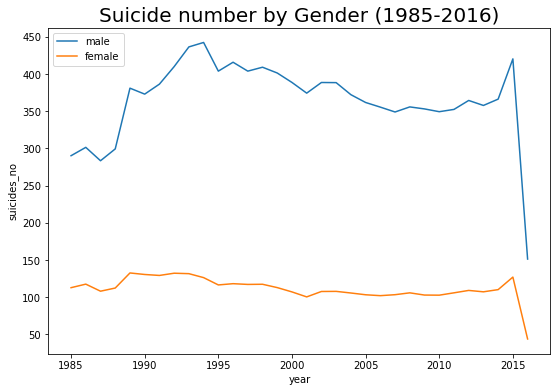

In [5]:
df_men = df[df.sex == 'male']
df_women = df[df.sex == 'female']
plt.figure(figsize=(9,6))
plt.title('Suicide number by Gender (1985-2016)', fontsize=20)
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()